In [1]:

import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
host = ''
port = ''
database = ''
user = ''
password = ''
def query_perma_by_experiment_name(experiment_name, type="init"):
    connection = None
    try:
        # 连接到MySQL数据库
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            port=port,
            password=password
        )
        if connection.is_connected():
            db_Info = connection.get_server_info()
            print("成功连接到MySQL数据库，版本：", db_Info)
            
            # 创建一个cursor对象
            cursor = connection.cursor()
            
            # 定义SQL查询语句
            query = "SELECT * FROM resident_daily_record WHERE experiment_name = %s ORDER BY create_time ASC"
            
            # 执行SQL查询
            cursor.execute(query, (experiment_name,))
            
            # 获取所有查询结果
            records = cursor.fetchall()
            perma_list = []
            sds_list = []
            sas_list = []
            gwb_list = []
            effectiveness_list = []
            effectiveness_x = []
            effectiveness_y_before = []
            effectiveness_y_after = []
            #time_list = []
            if(type == "init"):
                for i in range(len(records)-1):
                    perma_list.append(records[i][4])
                    sds_list.append(records[i][6])
                    sas_list.append(records[i][8])
                    gwb_list.append(records[i][10])
                #time_list.append(records[i][2])
                return perma_list,  sds_list, sas_list, gwb_list, records
            elif(type == "after"):
                for i in range(len(records)):
                    if(i+1<len(records) and (records[i][3]!="接受心理干预" and records[i+1][3]=="接受心理干预")):
                        effectiveness_list.append(records[i+1][4]-records[i][4]) 
                    else:
                        perma_list.append(records[i][4])
                        sds_list.append(records[i][6])
                        sas_list.append(records[i][8])
                        gwb_list.append(records[i][10])

                return perma_list,  sds_list, sas_list, gwb_list, effectiveness_list, records
            elif(type == "effectiveness"):
                for i in range(len(records)):
                    if(i+1<len(records) and (records[i][3]!="接受心理干预" and records[i+1][3]=="接受心理干预")):
                        effectiveness_list.append(records[i+1][4]-records[i][4]) 
                        effectiveness_x.append(len(perma_list))
                        effectiveness_y_before.append(records[i][4])
                        effectiveness_y_after.append(records[i+1][4])
                    else:
                        perma_list.append(records[i][4])
                        sds_list.append(records[i][6])
                        sas_list.append(records[i][8])
                        gwb_list.append(records[i][10])
                return perma_list,  sds_list, sas_list, gwb_list, effectiveness_list, effectiveness_x, effectiveness_y_before, effectiveness_y_after, records
                
    except Error as e:
        print("连接或查询失败：", e)
    
    finally:
        # 关闭cursor和connection
        if connection and connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL连接已关闭")

# 调用函数
def draw_d5(experiment_name, title):
    perma_list,  sds_list, sas_list, gwb_list, records=query_perma_by_experiment_name(experiment_name=experiment_name)
    # print(perma_list)
    # print(records)
    # plt.yscale("log")
    # plt.plot(range(len(perma_list)), perma_list, marker="o")
    # plt.plot(range(len(perma_list)), sds_list, marker="o")
    # plt.plot(range(len(perma_list)), sas_list, marker="o")
    # plt.plot(range(len(perma_list)), gwb_list, marker="o")
    # plt.show()

    x=range(len(perma_list))
    # 创建一个图表
    fig, ax1 = plt.subplots()

    # 绘制第一个y轴的数据
    ax1.plot(x, perma_list, 'g-', label='perma')
    ax1.plot(x, sds_list, 'b-', label='sds')
    ax1.set_xlabel('Action num')
    ax1.set_ylabel('Small value', color='g')  # 第一个y轴的标签
    ax1.tick_params('y', colors='g')

    # 设置第一个y轴的值域
    ax1.set_ylim(0, 10)

    # 创建第二个y轴
    ax2 = ax1.twinx()

    # 绘制第二个y轴的数据
    ax2.plot(x, sas_list, 'purple', label='sas')
    ax2.plot(x, gwb_list, 'r-', label='gwb')
    ax2.set_ylabel('Large value', color='r')  # 第二个y轴的标签
    ax2.tick_params('y', colors='r')

    # 设置第二个y轴的值域
    ax2.set_ylim(30, 150)  # 假设这是你想要的值域

    # 添加图例
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f"{title}")
    # 显示图表
    plt.savefig(f"./fig/init/{title}.png")
    plt.show()
#experiment_name ="test_init_xiaoli_plus_812_2145"
#title="Xiaoli_d5_daily"
#draw_d5(experiment_name, title)

成功连接到MySQL数据库，版本： 5.7.24
MySQL连接已关闭
成功连接到MySQL数据库，版本： 5.7.24
MySQL连接已关闭


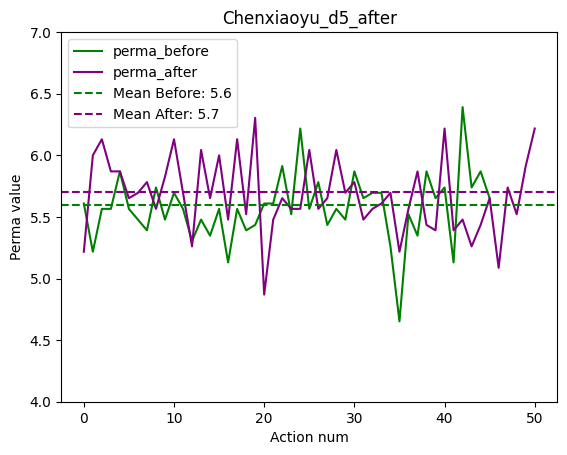

In [33]:
import numpy as np
import math
def draw_d5_after(experiment_name1, experiment_name2, title):
    perma_list,  sds_list, sas_list, gwb_list, records=query_perma_by_experiment_name(experiment_name=experiment_name1, type = "init")
    
    after_perma_list,  after_sds_list, after_sas_list, after_gwb_list, _,after_records=query_perma_by_experiment_name(experiment_name=experiment_name2, type="after")
    all_perma = perma_list + after_perma_list
    l = round(min(all_perma))-1
    if l<=0:
        l=0
    h = round(max(all_perma))+1
    if h>=10:
        h=10
    x1=range(len(perma_list))
    x2=range(len(after_perma_list))
    # 创建一个图表
    fig, ax1 = plt.subplots()
    max_x = max(len(x1), len(x2))
    # 绘制第一个y轴的数据
    ax1.plot(x1, perma_list, 'g-', label='perma_before')
    ax1.plot(x2, after_perma_list, 'purple', label='perma_after')
    ax1.set_xlabel('Action num')
    ax1.set_ylabel('Perma value')  # 第一个y轴的标签
    ax1.tick_params('y')

    mean1 = round(np.mean(perma_list), 1)
    mean2 = round(np.mean(after_perma_list), 1)
    #variance1 = np.var(perma_list)
    #variance2 = np.var(after_perma_list)

    ax1.axhline(y=mean1, color='g', linestyle='--', label=f'Mean Before: {mean1:.1f}')
    ax1.axhline(y=mean2, color='purple', linestyle='--', label=f'Mean After: {mean2:.1f}')

    ax1.set_ylim(l, h)

    ax1.legend(loc='upper left')
    plt.title(f"{title}")
    # 显示图表
    plt.savefig(f"./fig/after_1/{title}.png")
    plt.show()

# experiment_name1 = "test_init_xiaoli_plus_812_2145" 
# experiment_name2 ="main_812_2248_d5_sl05"
# title="Xiaoli_d5_after"

# experiment_name1 = "init_linwei_813_2213_d5" 
# experiment_name2 ="main_linwei_814_0058_sl05_d5"
# title="Linwei_d5_after"

# experiment_name1 = "init_liting_813_2213_d5" 
# experiment_name2 ="main_liting_814_0058_sl05_d5"
# title="Liting_d5_after"

# experiment_name1 = "init_zhangwei_813_2213_d5" 
# experiment_name2 ="main_zhangwei_814_0058_sl05_d5"
# title="Zhangwei_d5_after"

# experiment_name1 = "init_chenxiumei_813_2213_d5" 
# experiment_name2 ="main_chenxiumei_814_0058_sl05_d5"
# title="Chenxiumei_d5_after"

# experiment_name1 = "init_chenxiaoyu_813_2213_d5" 
# experiment_name2 ="main_chenxiaoyu_814_0058_sl05_d5"
# title="Chenxiaoyu_d5_after"
# draw_d5_after(experiment_name1, experiment_name2, title)

成功连接到MySQL数据库，版本： 5.7.24
MySQL连接已关闭


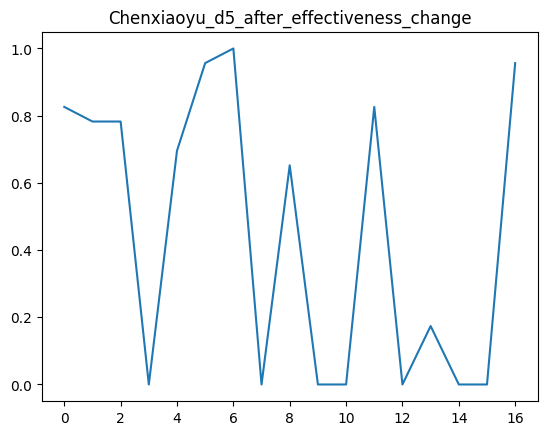

In [35]:
def draw_d5_after_effectiveness_change(experiment_name, title):
    
    after_perma_list,  after_sds_list, after_sas_list, after_gwb_list, effectiveness_list, after_records=query_perma_by_experiment_name(experiment_name=experiment_name, type="after")
    
    l = round(min(after_perma_list))-1
    if l<=0:
        l=0
    h = round(max(after_perma_list))+1
    if h>=10:
        h=10
    plt.plot(range(len(effectiveness_list)), effectiveness_list, label='effectiveness')
    plt.title(f"{title}")
    # 显示图表
    plt.savefig(f"./fig/effectiveness_change/{title}.png")
    plt.show()

# experiment_name2 ="main_812_2248_d5_sl05"
# title="Xiaoli_d5_after_effectiveness_change"


# experiment_name2 ="main_linwei_814_0058_sl05_d5"
# title="Linwei_d5_after_effectiveness_change"


# experiment_name2 ="main_liting_814_0058_sl05_d5"
# title="Liting_d5_after_effectiveness_change"


# experiment_name2 ="main_zhangwei_814_0058_sl05_d5"
# title="Zhangwei_d5_after_effectiveness_change"

# experiment_name2 ="main_chenxiaoyu_814_0058_sl05_d5"
# title="Chenxiaoyu_d5_after_effectiveness_change"

# experiment_name2 ="main_chenxiumei_814_0058_sl05_d5"
# title="Chenxiumei_d5_after_effectiveness_change"
#draw_d5_after_effectiveness_change(experiment_name2, title)

成功连接到MySQL数据库，版本： 5.7.24
MySQL连接已关闭


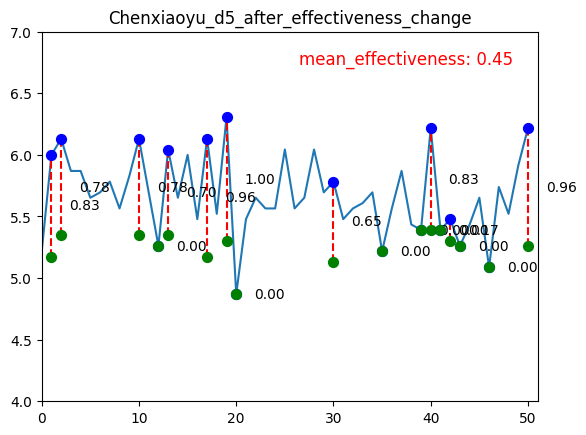

In [36]:
import numpy as np
def draw_d5_after_with_effectiveness(experiment_name, title):
    
    perma_list,  sds_list, sas_list, gwb_list, effectiveness_list, effectiveness_x, effectiveness_y_before, effectiveness_y_after, records=query_perma_by_experiment_name(experiment_name=experiment_name, type="effectiveness")
    
    l = round(min(perma_list))-1
    if l<=0:
        l=0
    h = round(max(perma_list))+1
    if h>=10:
        h=10
    ax = plt.gca()  # 获取当前的轴对象
    ax.set_xlim([0, len(perma_list)])
    ax.set_ylim([l, h])  
    plt.plot(range(len(perma_list)), perma_list, label='perma')
    for i, x_val in enumerate(effectiveness_x):
        plt.scatter(x_val, effectiveness_y_after[i], color='blue', s=50, zorder=4)  # 点的大小和颜色可以调整
        plt.scatter(x_val, effectiveness_y_before[i], color='green', s=50, zorder=4)
        plt.plot([x_val, x_val], [effectiveness_y_before[i], effectiveness_y_after[i]], linestyle='--', color='red')
        y_diff = effectiveness_y_after[i] - effectiveness_y_before[i]
        plt.text(x_val+5, (effectiveness_y_after[i] + effectiveness_y_before[i]) / 2, f'{y_diff:.2f}', ha='right', va='center', color='black')
    mean_effectiveness = round(np.mean(effectiveness_list),2)
    plt.text(0.95, 0.95, f'mean_effectiveness: {mean_effectiveness}', transform=ax.transAxes,  # 使用轴坐标系
         horizontalalignment='right', verticalalignment='top',  # 右上角对齐
         color='red', fontsize=12)
    plt.title(f"{title}")
    # 显示图表
    plt.savefig(f"./fig/perma_with_effectiveness/{title}.png")
    plt.show()

# experiment_name2 ="main_812_2248_d5_sl05"
# title="Xiaoli_d5_after_perma_with_effectiveness"


# experiment_name2 ="main_linwei_814_0058_sl05_d5"
# title="Linwei_d5_after_perma_with_effectiveness"

# experiment_name2 ="main_chenxiaoyu_814_0058_sl05_d5"
# title="Chenxiaoyu_d5_after_effectiveness_change"

# experiment_name2 ="main_liting_814_0058_sl05_d5"
# title="Liting_d5_after_perma_with_effectiveness"


# experiment_name2 ="main_zhangwei_814_0058_sl05_d5"
# title="Zhangwei_d5_after_perma_with_effectiveness"


# experiment_name2 ="main_chenxiumei_814_0058_sl05_d5"
# title="Chenxiumei_d5_after_perma_with_effectiveness"
#draw_d5_after_with_effectiveness(experiment_name2, title)